In [1]:
import numpy as np
import pandas as pd 
import datetime
from tqdm import tqdm
import pandas_datareader.naver as web_naver
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
start = '2007-09-01'
end = '2021-12-31'

In [4]:
dividend=pd.read_csv('dividend.csv',index_col=0,parse_dates=True)
dps=pd.read_csv('dps.csv',index_col=0,parse_dates=True)

In [5]:
price_quarter=pd.read_csv('price_panel_quarter.csv',index_col=0,parse_dates=True)

### 선견편향을 고려해보자. 1분기 배당 수익률 및 dpm은 작년 것을 기준으로 하는 것이 아닌 제작년것을 기준으러 하자.

In [6]:
quarter=list(price_quarter.index)
dividend.fillna(method='ffill',inplace=True)
dividend_quarter=dividend.loc[quarter]

In [7]:
months=[]
for i in dividend.index:
    months.append(str(i)[:7])
months = list(set(months))
months_quarter=[]
for i in months:
    
    if (i[-2:]=='12') or (i[-2:]=='03') or (i[-2:]=='06') or (i[-2:]=='09'):
        months_quarter.append(i)
quarter=[]
for month in months_quarter:
    quarter.append(str(dividend.loc[month].index[-1])[:10])
quarter.sort()

In [8]:

dividend.fillna(method='ffill',inplace=True)
dividend_quarter=dividend.loc[quarter]

In [9]:
#dividend_quarter
"""
dividend_unbiased=pd.DataFrame(columns=dividend_quarter.columns,index=dividend_quarter.index)
for i in range(len(dividend_quarter)-8):
    if i%4==2:
        dividend_unbiased.iloc[i+8]=dividend_quarter.iloc[i]
    else:
        dividend_unbiased.iloc[i+4]=dividend_quarter.iloc[i]

dive=dividend_unbiased.iloc[4:]
dive=dive.iloc[:-3]
dive.fillna(method='ffill',inplace=True)
dive"""

"\ndividend_unbiased=pd.DataFrame(columns=dividend_quarter.columns,index=dividend_quarter.index)\nfor i in range(len(dividend_quarter)-8):\n    if i%4==2:\n        dividend_unbiased.iloc[i+8]=dividend_quarter.iloc[i]\n    else:\n        dividend_unbiased.iloc[i+4]=dividend_quarter.iloc[i]\n\ndive=dividend_unbiased.iloc[4:]\ndive=dive.iloc[:-3]\ndive.fillna(method='ffill',inplace=True)\ndive"

In [10]:
"""
def portfolio_construction(price,dividend,start,end):
    #dividend
    dividend_unbiased=pd.DataFrame(columns=dividend.columns,index=dividend.index)
    for i in range(len(dividend)-8):
        if i%4==2:
            dividend_unbiased.iloc[i+8]=dividend.iloc[i]
        else:
            dividend_unbiased.iloc[i+4]=dividend.iloc[i]
    dividend_unbiased=dividend_unbiased.iloc[4:].copy()
    dividend_unbiased=dividend_unbiased[:-3].copy()
    dividend_unbiased.fillna(method='ffill',inplace=True)

    rtn=np.log(price/price.shift(1))*100
    rtn=rtn.iloc[1:].copy()
    date_return_tickers=dict()

    rtn=rtn.reindex(dividend_unbiased.index)

    for i in range(len(dividend_unbiased.index)):
        tickers=dividend_unbiased.iloc[i].dropna().rank(method='first',ascending=False)\
            [(dividend_unbiased.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
                (dividend_unbiased.iloc[i].dropna().rank(method='first',ascending=False)>=start)].index.values

        tickers=list(tickers)
        date_return_tickers[rtn.index[i]]=\
            [[np.dot(rtn.iloc[i].reindex(tickers).fillna(-99).values,np.array([1/len(tickers) for i in range(len(tickers))]))],tickers]
        
    return date_return_tickers"""

"\ndef portfolio_construction(price,dividend,start,end):\n    #dividend\n    dividend_unbiased=pd.DataFrame(columns=dividend.columns,index=dividend.index)\n    for i in range(len(dividend)-8):\n        if i%4==2:\n            dividend_unbiased.iloc[i+8]=dividend.iloc[i]\n        else:\n            dividend_unbiased.iloc[i+4]=dividend.iloc[i]\n    dividend_unbiased=dividend_unbiased.iloc[4:].copy()\n    dividend_unbiased=dividend_unbiased[:-3].copy()\n    dividend_unbiased.fillna(method='ffill',inplace=True)\n\n    rtn=np.log(price/price.shift(1))*100\n    rtn=rtn.iloc[1:].copy()\n    date_return_tickers=dict()\n\n    rtn=rtn.reindex(dividend_unbiased.index)\n\n    for i in range(len(dividend_unbiased.index)):\n        tickers=dividend_unbiased.iloc[i].dropna().rank(method='first',ascending=False)            [(dividend_unbiased.iloc[i].dropna().rank(method='first',ascending=False)<end)&                (dividend_unbiased.iloc[i].dropna().rank(method='first',ascending=False)>=start)].inde

In [11]:
def portfolio_construction(price,dividend,start,end):
    #dividend
    dividend_unbiased=pd.DataFrame(columns=dividend.columns,index=dividend.index)
    for i in range(len(dividend)-8):
        if i%4==2:
            dividend_unbiased.iloc[i+8]=dividend.iloc[i]
        else:
            dividend_unbiased.iloc[i+4]=dividend.iloc[i]
    dividend_unbiased=dividend_unbiased.iloc[4:].copy()
    dividend_unbiased=dividend_unbiased[:-3].copy()
    dividend_unbiased.fillna(method='ffill',inplace=True)

    rtn=np.log(price/price.shift(1))*100
    rtn=rtn.iloc[1:].copy()
    date_return_tickers=dict()

    rtn=rtn.reindex(dividend_unbiased.index)
    rtn=rtn.iloc[2:]

    for i in range(len(rtn.index)):
        tickers=dividend_unbiased.iloc[i].dropna().rank(method='first',ascending=False)\
            [(dividend_unbiased.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
                (dividend_unbiased.iloc[i].dropna().rank(method='first',ascending=False)>=start)].index.values

        tickers=list(tickers)
        date_return_tickers[rtn.index[i]]=\
            [[np.dot(rtn.iloc[i].reindex(tickers).fillna(-99).values,np.array([1/len(tickers) for i in range(len(tickers))]))],tickers]
        
    return date_return_tickers

    

In [12]:
high_diviend=portfolio_construction(price=price_quarter,dividend=dividend_quarter,start=0,end=300)

In [13]:
low_diviend=portfolio_construction(price=price_quarter,dividend=dividend_quarter,start=500,end=800)

In [14]:
print('high_dividend')
for i in range(1,len(high_diviend.keys())):
    print(list(high_diviend.keys())[i])
    sub=len([x for x in high_diviend[list(high_diviend.keys())[i]][1] if x not in high_diviend[list(high_diviend.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( high_diviend[list(high_diviend.keys())[i-1]][1])}')
    print('편입',[x for x in high_diviend[list(high_diviend.keys())[i]][1] if x not in high_diviend[list(high_diviend.keys())[i-1]][1]])
    print('퇴출',[x for x in high_diviend[list(high_diviend.keys())[i-1]][1] if x not in high_diviend[list(high_diviend.keys())[i]][1]])



high_dividend
2009-06-30 00:00:00
교체비율: 0.07692307692307693
편입 ['051600', '009830', '009160', '001770', '093230', '004560', '003030', '000070', '092440', '013580', '002070', '012200', '002210', '001970', '005745', '033250', '000990', '000850', '005960', '011390', '089470', '019300', '004565']
퇴출 ['086790', '006840', '051905', '008040', '051630', '003530', '009720', '078930', '019170', '014790', '001040', '005980', '001720', '036460', '001340', '005500', '079430', '003475', '003690', '000230', '000215', '020560', '066575']
2009-09-30 00:00:00
교체비율: 0.0
편입 []
퇴출 []
2009-12-30 00:00:00
교체비율: 0.20735785953177258
편입 ['005850', '003495', '033180', '086790', '016710', '011090', '005190', '028670', '006840', '051905', '003160', '009190', '051630', '012280', '003530', '001370', '009540', '078930', '000835', '001560', '004310', '019170', '001880', '044450', '005250', '003555', '005350', '008260', '005980', '001720', '000520', '032640', '000885', '006570', '021240', '000325', '092230', '003940', 

In [15]:
print('low_dividend')
for i in range(1,len(low_diviend.keys())):
    print(list(low_diviend.keys())[i])
    sub=len([x for x in low_diviend[list(low_diviend.keys())[i]][1] if x not in low_diviend[list(low_diviend.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( low_diviend[list(low_diviend.keys())[i-1]][1])}')
    print('편입',[x for x in low_diviend[list(low_diviend.keys())[i]][1] if x not in low_diviend[list(low_diviend.keys())[i-1]][1]])
    print('퇴출',[x for x in low_diviend[list(low_diviend.keys())[i-1]][1] if x not in low_diviend[list(low_diviend.keys())[i]][1]])

low_dividend
2009-06-30 00:00:00
교체비율: 0.07333333333333333
편입 ['028670', '042100', '000640', '025860', '066570', '000810', '003550', '006340', '094280', '039490', '092200', '000060', '001620', '000105', '051310', '004025', '047050', '001450', '003000', '000210', '009275', '000140']
퇴출 ['004140', '090370', '036530', '012450', '009440', '010580', '017900', '028050', '004430', '033250', '002790', '014590', '011160', '011400', '004147', '008970', '002787', '063160', '002240', '002220', '007610', '069730']
2009-09-30 00:00:00
교체비율: 0.0
편입 []
퇴출 []
2009-12-30 00:00:00
교체비율: 0.2
편입 ['102260', '004367', '068270', '024890', '005450', '004140', '100840', '006350', '001047', '102280', '081000', '004490', '004360', '015860', '001045', '006390', '006345', '101060', '101140', '001040', '018470', '008770', '007540', '032390', '000070', '015110', '006110', '001340', '085310', '021820', '003640', '005500', '100220', '006400', '002760', '084010', '101990', '008720', '011930', '001970', '010520', '035150

In [16]:
kospi=web_naver.NaverDailyReader(symbols='KOSPI', start=start,end=end,adjust_price=True)
kospi=kospi.read()
kospi=kospi.astype(float)

In [17]:
portfolio=pd.DataFrame(index=high_diviend.keys())
portfolio['high_dividend']=pd.Series(np.array([rtn[0] for rtn in list(high_diviend.values())]).flatten(),index=high_diviend.keys())
portfolio['low_dividend']=pd.Series(np.array([rtn[0] for rtn in list(low_diviend.values())]).flatten(),index=low_diviend.keys())

In [18]:
kospi=kospi.loc[portfolio.index,:]['Close']
portfolio['KOSPI']=np.log(kospi/kospi.shift(1))*100



In [19]:
print("mean","\n",portfolio.mean())
print("")
print("std","\n",portfolio.std())
print("")
print("skewness","\n",portfolio.skew())
print("")
print("kurtosis","\n",portfolio.kurtosis())
print("")
print("sharpe ratio","\n", portfolio.mean() / portfolio.std())

mean 
 high_dividend    -6.422972
low_dividend    -16.434047
KOSPI             1.940321
dtype: float64

std 
 high_dividend     9.688541
low_dividend     10.223834
KOSPI             8.211058
dtype: float64

skewness 
 high_dividend   -0.746897
low_dividend     0.338123
KOSPI           -0.317174
dtype: float64

kurtosis 
 high_dividend    2.381716
low_dividend     0.516527
KOSPI            1.616552
dtype: float64

sharpe ratio 
 high_dividend   -0.662945
low_dividend    -1.607425
KOSPI            0.236306
dtype: float64


<AxesSubplot:>

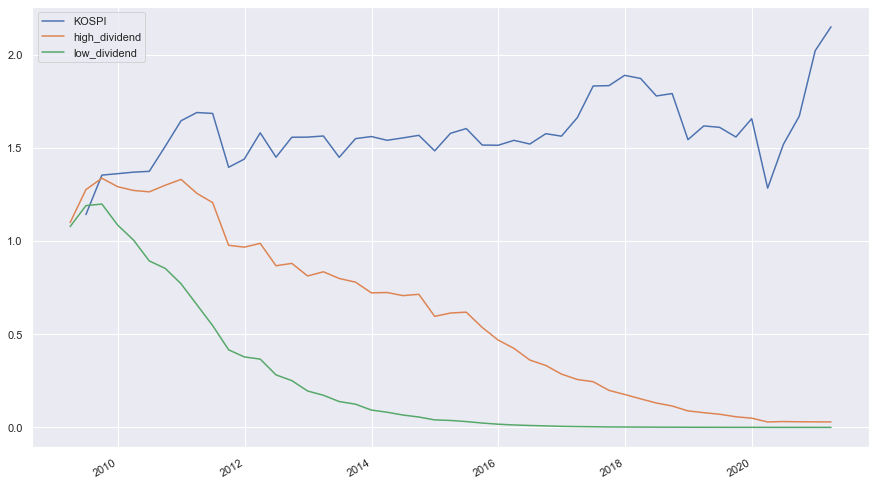

In [20]:
cum_rtn=portfolio[['KOSPI','high_dividend','low_dividend']]/100
(1+cum_rtn).cumprod().plot(figsize=(15,9))

In [21]:
def portfolio_construction1(price,dividend,start,end):
    #dividend
    dividend=dividend.iloc[4:]
    rtn=np.log(price/price.shift(1))*100
    rtn=rtn.iloc[1:].copy()
    date_return_tickers=dict()

    rtn=rtn.reindex(dividend.index)
    rtn=rtn.iloc[2:]

    for i in range(len(rtn.index)):
        tickers=dividend.iloc[i].dropna().rank(method='first',ascending=False)\
            [(dividend.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
                (dividend.iloc[i].dropna().rank(method='first',ascending=False)>=start)].index.values

        tickers=list(tickers)
        date_return_tickers[rtn.index[i]]=\
            [[np.dot(rtn.iloc[i].reindex(tickers).fillna(-99).values,np.array([1/len(tickers) for i in range(len(tickers))]))],tickers]
        
    return date_return_tickers

In [22]:
high_diviend1=portfolio_construction1(price=price_quarter,dividend=dividend_quarter,start=0,end=300)
low_diviend1=portfolio_construction1(price=price_quarter,dividend=dividend_quarter,start=500,end=800)

In [23]:
print('high_dividend')
for i in range(1,len(high_diviend1.keys())):
    print(list(high_diviend1.keys())[i])
    sub=len([x for x in high_diviend1[list(high_diviend1.keys())[i]][1] if x not in high_diviend1[list(high_diviend1.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( high_diviend1[list(high_diviend1.keys())[i-1]][1])}')
    print('편입',[x for x in high_diviend1[list(high_diviend1.keys())[i]][1] if x not in high_diviend1[list(high_diviend1.keys())[i-1]][1]])
    print('퇴출',[x for x in high_diviend1[list(high_diviend1.keys())[i-1]][1] if x not in high_diviend1[list(high_diviend1.keys())[i]][1]])



high_dividend
2009-06-30 00:00:00
교체비율: 0.0903010033444816
편입 ['028670', '002990', '003530', '005830', '004310', '003220', '011500', '036530', '025890', '001430', '025000', '012580', '002000', '092230', '004555', '011780', '001470', '002220', '000850', '002170', '005880', '007210', '089470', '004835', '053000', '084870', '002550']
퇴출 ['016420', '068290', '005180', '026960', '016090', '023150', '019170', '014827', '093230', '033780', '016580', '032640', '092440', '001020', '009770', '007590', '051310', '036580', '004147', '072130', '034310', '010050', '072710', '000230', '019300', '002380', '017550']
2009-09-30 00:00:00
교체비율: 0.07023411371237458
편입 ['068290', '023150', '029780', '001370', '014827', '005250', '033780', '002820', '012335', '032640', '036460', '002070', '009680', '055550', '036580', '016380', '034310', '030000', '072710', '002380', '017550']
퇴출 ['033180', '003530', '005830', '007800', '025890', '014790', '012580', '009155', '006125', '015890', '042700', '049770', '024720',

In [24]:
print('low_dividend')
for i in range(1,len(low_diviend1.keys())):
    print(list(low_diviend1.keys())[i])
    sub=len([x for x in low_diviend1[list(low_diviend1.keys())[i]][1] if x not in low_diviend1[list(low_diviend1.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( low_diviend1[list(low_diviend1.keys())[i-1]][1])}')
    print('편입',[x for x in low_diviend1[list(low_diviend1.keys())[i]][1] if x not in low_diviend1[list(low_diviend1.keys())[i-1]][1]])
    print('퇴출',[x for x in low_diviend1[list(low_diviend1.keys())[i-1]][1] if x not in low_diviend1[list(low_diviend1.keys())[i]][1]])

low_dividend
2009-06-30 00:00:00
교체비율: 0.056666666666666664
편입 ['023960', '000240', '009150', '000810', '010960', '005740', '011200', '007340', '009310', '003490', '003690', '000180', '002410', '069620', '011390', '006260', '000950']
퇴출 ['004140', '081000', '001465', '030610', '021820', '001080', '002620', '011810', '071090', '004800', '001689', '005430', '004710', '005620', '003280', '064960', '000880']
2009-09-30 00:00:00
교체비율: 0.05333333333333334
편입 ['008420', '007575', '001515', '012450', '002710', '109070', '001500', '039490', '105630', '108070', '001970', '002620', '004800', '004710', '033270', '005930']
퇴출 ['000240', '008040', '000810', '005740', '002797', '011200', '097959', '031820', '008405', '002790', '003690', '000180', '002410', '007610', '069620', '011390']
2009-12-30 00:00:00
교체비율: 0.26666666666666666
편입 ['003495', '086790', '011090', '015760', '021050', '108670', '005810', '003160', '023150', '009190', '016880', '000800', '008040', '051630', '012280', '015230', '006360'

In [25]:
portfolio=pd.DataFrame(index=high_diviend1.keys())
portfolio['high_dividend1']=pd.Series(np.array([rtn[0] for rtn in list(high_diviend1.values())]).flatten(),index=high_diviend1.keys())
portfolio['low_dividend1']=pd.Series(np.array([rtn[0] for rtn in list(low_diviend1.values())]).flatten(),index=low_diviend1.keys())

portfolio['KOSPI']=np.log(kospi/kospi.shift(1))*100



In [26]:
print("mean","\n",portfolio.mean())
print("")
print("std","\n",portfolio.std())
print("")
print("skewness","\n",portfolio.skew())
print("")
print("kurtosis","\n",portfolio.kurtosis())
print("")
print("sharpe ratio","\n", portfolio.mean() / portfolio.std())

mean 
 high_dividend1    -6.217918
low_dividend1    -16.101461
KOSPI              1.940321
dtype: float64

std 
 high_dividend1    9.644021
low_dividend1     9.969203
KOSPI             8.211058
dtype: float64

skewness 
 high_dividend1   -0.547137
low_dividend1     0.216398
KOSPI            -0.317174
dtype: float64

kurtosis 
 high_dividend1    1.945569
low_dividend1     0.754953
KOSPI             1.616552
dtype: float64

sharpe ratio 
 high_dividend1   -0.644743
low_dividend1    -1.615120
KOSPI             0.236306
dtype: float64


<AxesSubplot:>

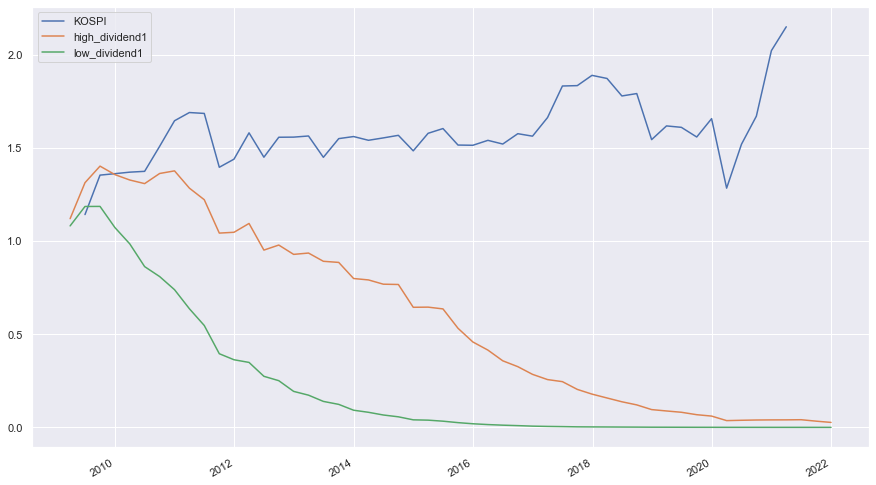

In [27]:
cum_rtn=portfolio[['KOSPI','high_dividend1','low_dividend1']]/100
(1+cum_rtn).cumprod().plot(figsize=(15,9))

선견 편향을 피하기 위해서 1분기는 제작년 1분기 나머지 분기는 작년 분기를 기준으로 포트폴리오를 구성하였지만 피하지 않을 때와 큰 차이가 없다